Data Visualization- Milestone 2

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the pre-processed data
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move up one level
data_path = os.path.join(repo_root, "data", "Data Preprocessing", "data_processing.csv")

# Ensure the directory exists
os.makedirs(os.path.dirname(data_path), exist_ok=True)

df_processed=pd.read_csv(data_path)


In [22]:
df_processed.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,previous,y,month_encoded,job_encoded,marital_encoded,contact_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,0,no,5,4,1,0,2.0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,0,no,5,9,2,0,1.0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,0,no,5,2,1,0,1.0,0,1,1
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,0,no,5,1,1,0,1.0,0,1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,0,no,5,1,2,0,1.0,0,0,0


Part 1: Dependent Variable distribution

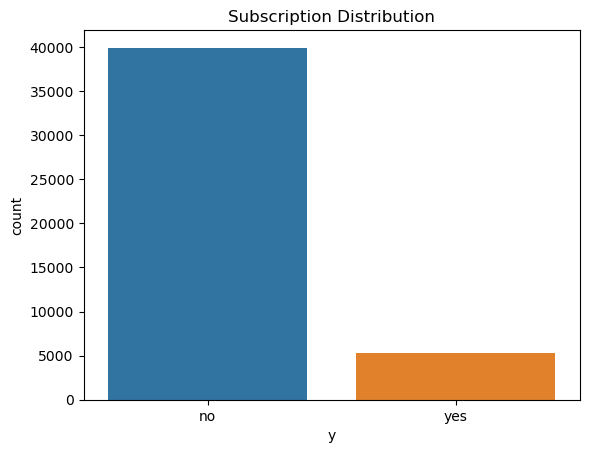

y
no     39922
yes     5289
Name: count, dtype: int64


In [20]:
sns.countplot(data=df_processed,x='y')
plt.title('Subscription Distribution')
plt.show()

print(df_processed['y'].value_counts())

Observation:

We notice that the dependent variable is imbalanced.

How to fix?

- For Tree-based Models (Random Forest, XGBoost): Using class weights often works well.
- For Logistic Regression or SVM: SMOTE is a strong choice.
- If Dataset is Large: Undersampling can be faster but riskier.


Part 2: Univariate Analysis

We have the encoded variables after y, ignoring that for the visulaization part alone

# Understanding Univariate Analysis  

Univariate Analysis examines a **single variable** to understand its **distribution, central tendency, and spread**.  

### 🔹 Key Questions:
- What is the **distribution** of the data?
- Are there **outliers**?
- How does the variable behave **on its own**?

| **Metric**            | **Insight**                                   | **Usage**                                  |
|----------------------|--------------------------------------------|------------------------------------------|
| **Mean/Median**      | Central tendency                          | Use **median** for skewed data         |
| **Mode**            | Most frequent value (categorical)         | Helps identify dominant classes        |
| **Standard Deviation** | Spread of data                          | High SD → More spread out data        |
| **Skewness**        | Symmetry of the distribution               | Skew > 0 → Right-skewed <br> Skew < 0 → Left-skewed |
| **Kurtosis**        | Tailedness of the distribution             | High kurtosis → Potential outliers     |
| **Outliers**        | Extreme values                             | Handle carefully before modeling      |

### **Interpreting Univariate Analysis for Modeling**
1. **Skewed Features** → Apply **log/square root transformations**  
2. **Outliers** → Remove, cap, or use **robust scalers**  
3. **Imbalanced Categorical Features** → Combine rare categories  
4. **Class Imbalance in Target** → Use **SMOTE, undersampling, or class weights**  


In [26]:
df=df_processed.loc[:,:'y']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  y            45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


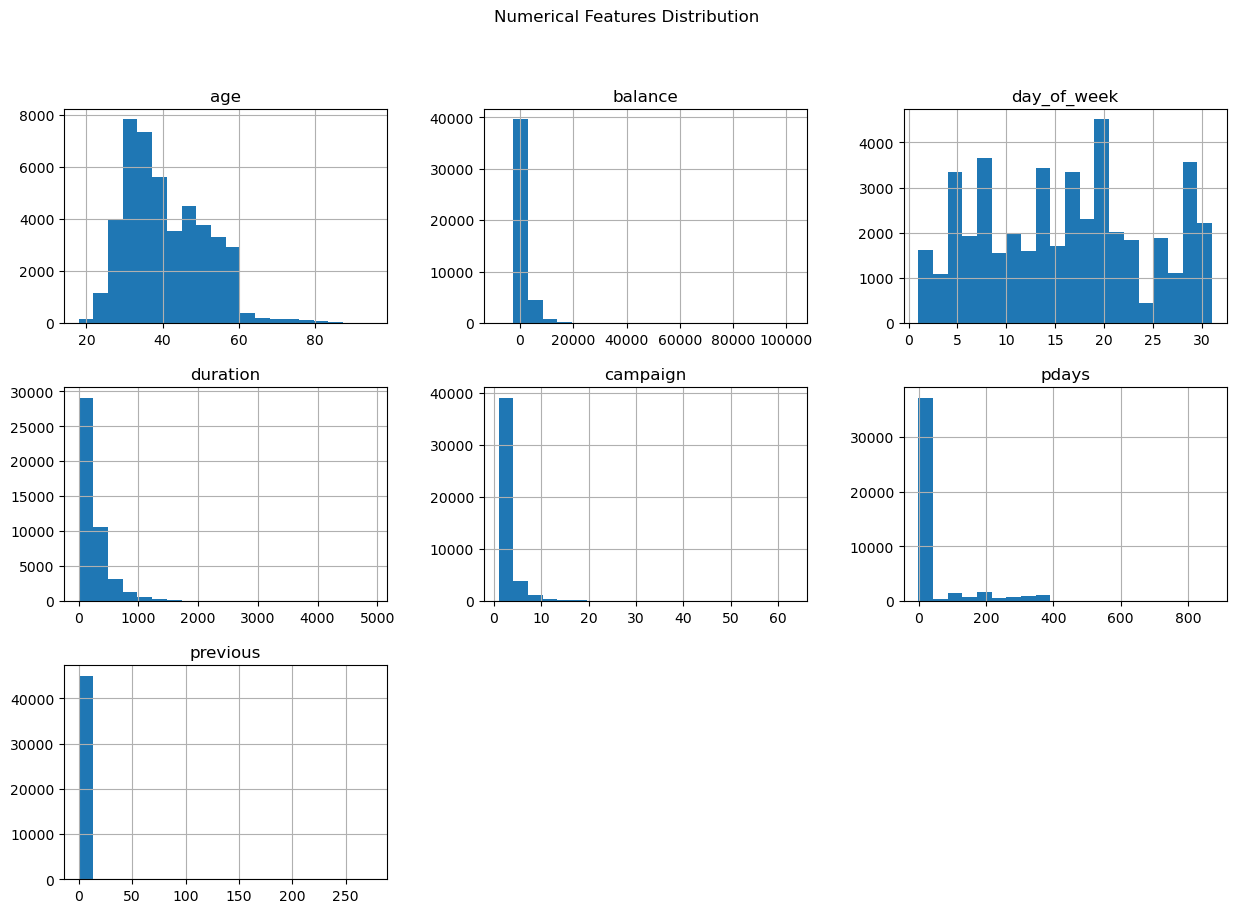

In [28]:
numerical_df=df[df.describe().columns]


numerical_df.hist(figsize=(15,10),bins=20)
plt.suptitle('Numerical Features Distribution')
plt.show()


In [33]:
summary_df = pd.DataFrame()
summary_df['Count'] = numerical_df.count()
summary_df['Mean'] = numerical_df.mean()
summary_df['Median'] = numerical_df.median()
summary_df['Std_Dev'] = numerical_df.std()
summary_df['Min'] =numerical_df.min()
summary_df['Max'] = numerical_df.max()
summary_df['Skewness'] = numerical_df.skew()
summary_df['Kurtosis'] = numerical_df.kurtosis()
summary_df

,Count,Mean,Median,Std_Dev,Min,Max,Skewness,Kurtosis
age,45211,40.936210,39.0,10.618762,18,95,0.684818,0.319570
balance,45211,1362.272058,448.0,3044.765829,-8019,102127,8.360308,140.751547
day_of_week,45211,15.806419,16.0,8.322476,1,31,0.093079,-1.059897
duration,45211,258.163080,180.0,257.527812,0,4918,3.144318,18.153915
campaign,45211,2.763841,2.0,3.098021,1,63,4.898650,39.249651
pdays,45211,40.197828,-1.0,100.128746,-1,871,2.615715,6.935195
previous,45211,0.580323,0.0,2.303441,0,275,41.846454,4506.860660


### 🔍 **Key Observations and Fixes**

| **Feature**     | **Observation**                                           | **Issue Detected?**                        | **Fix & Action Plan**                                              |
|-----------------|-----------------------------------------------------------|--------------------------------------------|--------------------------------------------------------------------|
| **Age**         | Right-skewed, concentrated between ages 30-50             | Outliers (ages above 70)                   | ✅ Binning into age groups (e.g., 18-30, 31-40, 41-50, etc.)        |
| **Balance**     | Extreme right-skewed distribution with high variance      | Outliers (Max: 100K), Skewness = 8.36      | ✅ Apply Log Transformation OR ✅ Cap extreme values                |
| **Day of Week** | Fairly uniform distribution with some missing values      | Unclear impact on target                   | ✅ Check correlation with target; drop if found irrelevant          |
| **Duration**    | Right-skewed, strong predictor of subscription success    | ⚠️ Risk of data leakage                    | ✅ Exclude during model training but use for post-prediction analysis |
| **Campaign**    | Majority contacted <5 times, but high outliers exist      | Heavy right-skewness                       | ✅ Cap values (Max=10) & ✅ Create Binary Feature (`high_contact_flag`) |
| **Pdays**       | Many 999 values indicating "never contacted before"       | Placeholder value issue                    | ✅ Create binary feature (`previous_contact`) & replace 999 with -1 |
| **Previous**    | Highly right-skewed with many zero values                 | Low variance in data                       | ✅ Apply Log Transformation OR ✅ Bin into categories (low, medium, high) |

---

This table highlights the **observations**, **issues detected**, and the **corrective actions** for each numerical feature, aimed at improving model performance and ensuring data integrity. 🚀


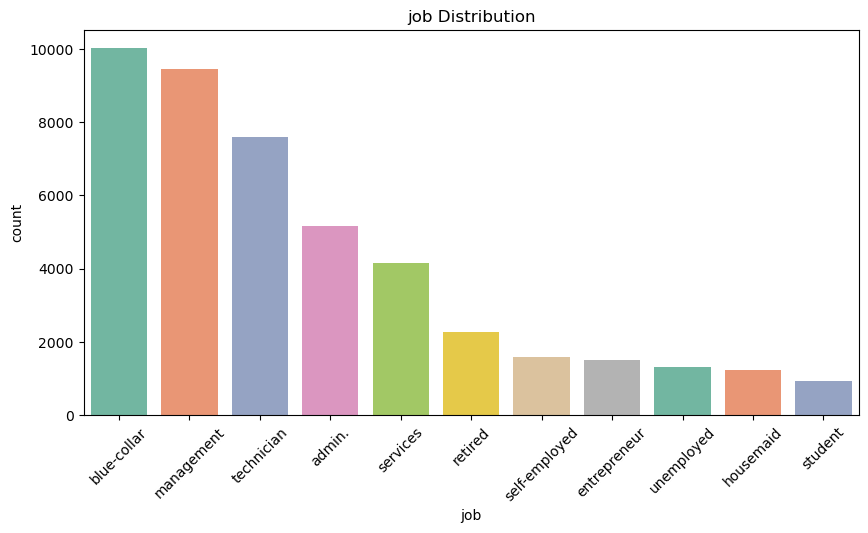

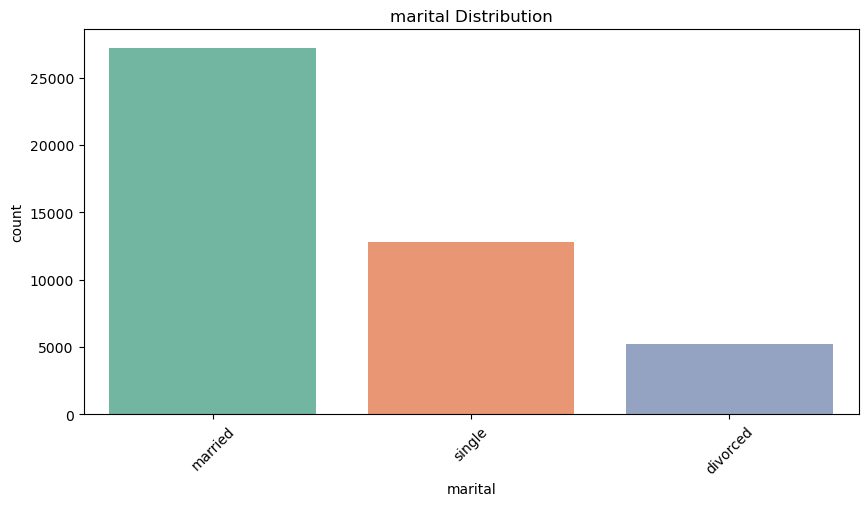

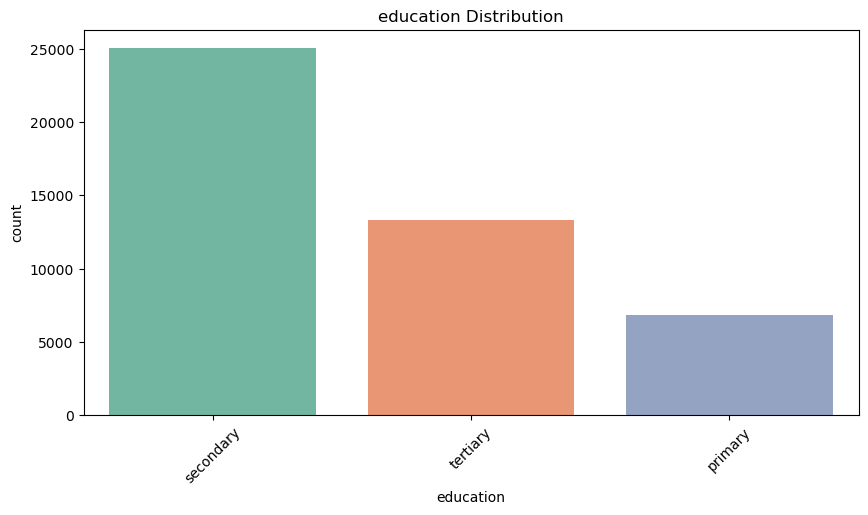

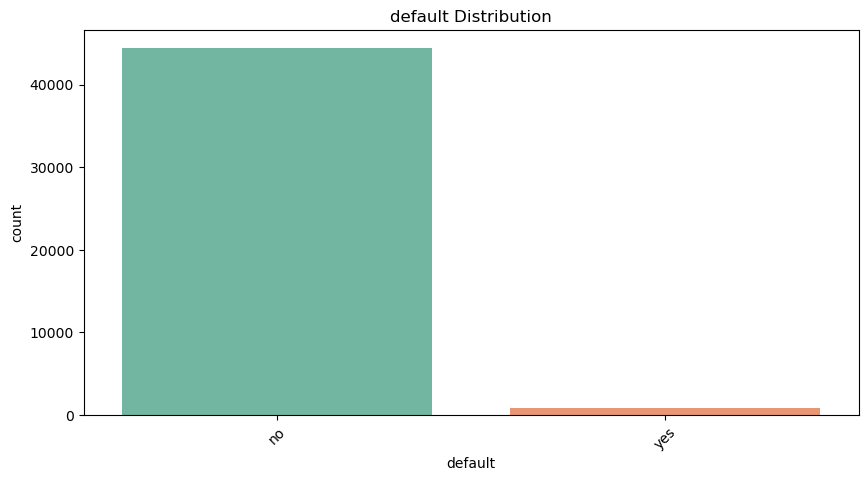

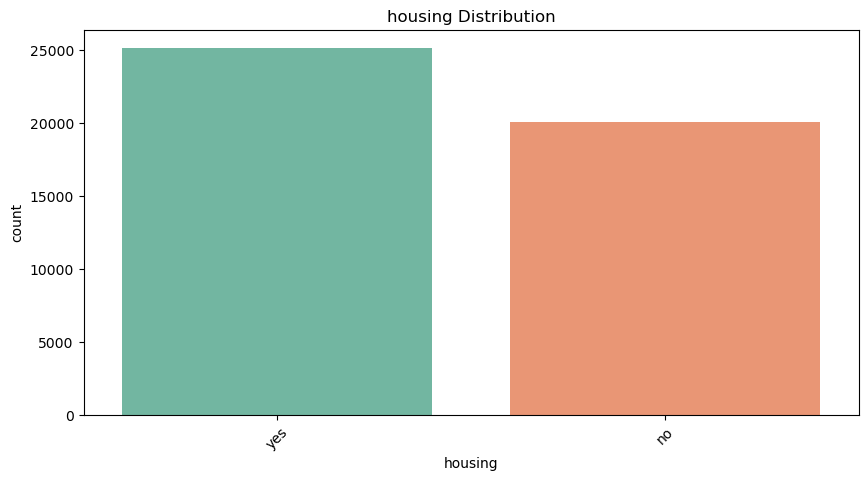

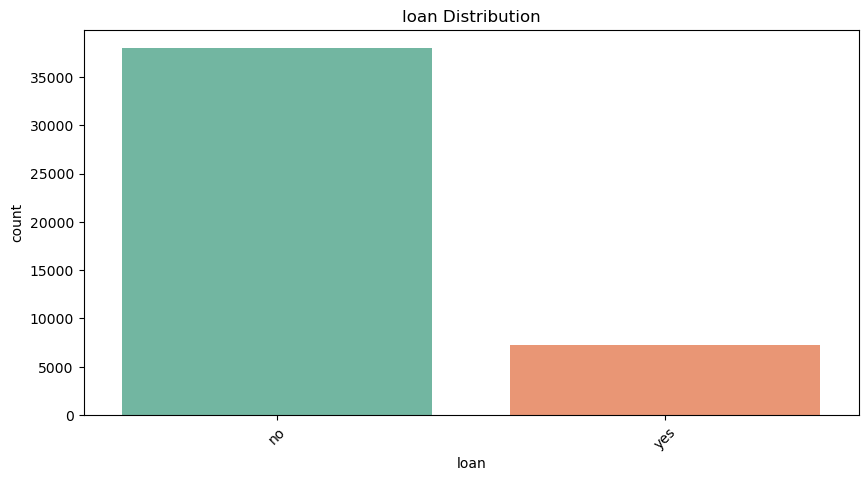

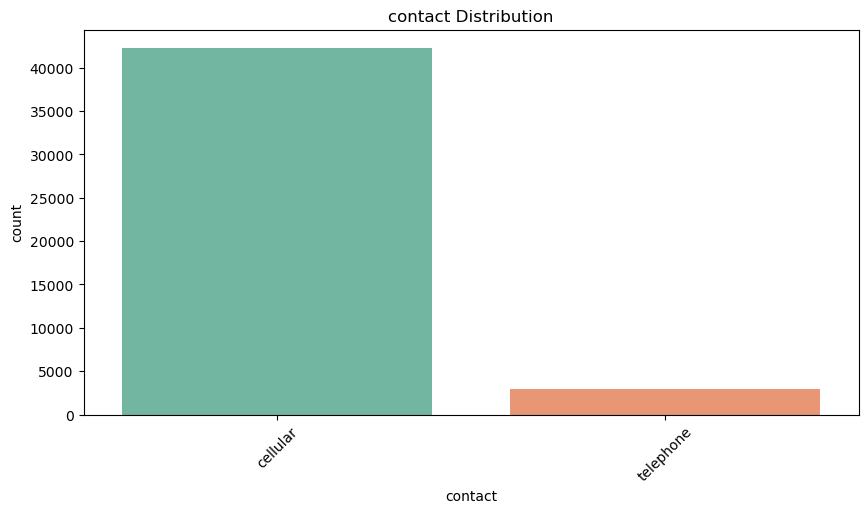

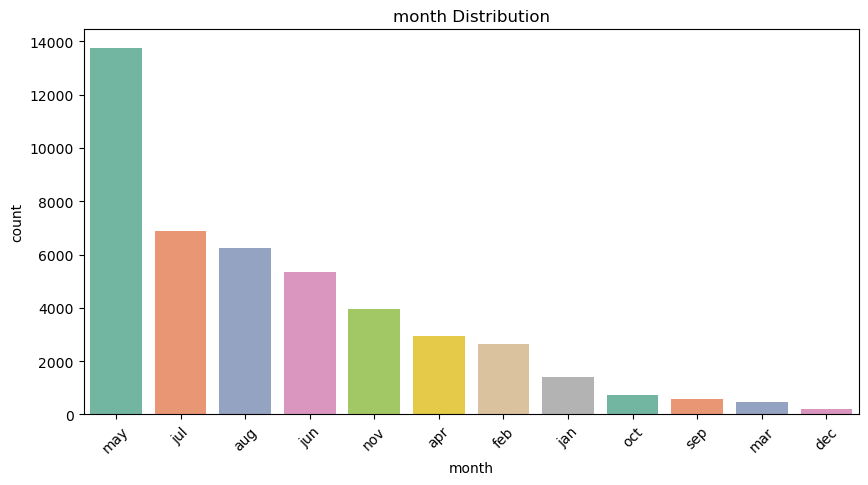

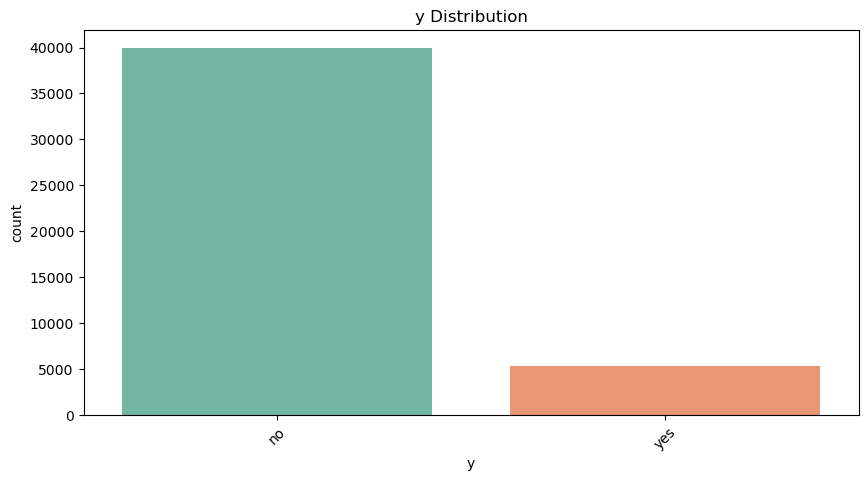

,Unique_Values,Most_Frequent,Frequency,Missing_Values
job,11,blue-collar,10020,0
marital,3,married,27214,0
education,3,secondary,25059,0
default,2,no,44396,0
housing,2,yes,25130,0
loan,2,no,37967,0
contact,2,cellular,42305,0
month,12,may,13766,0
y,2,no,39922,0


In [37]:
# Select categorical features
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Initialize a dictionary to store value counts
cat_value_counts = {}

# Plot countplots for categorical variables and store value counts
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()
    
    # Store value counts
    cat_value_counts[col] = df[col].value_counts()

# Create a summary DataFrame for categorical variables
cat_summary_df = pd.DataFrame({
    'Unique_Values': df[cat_cols].nunique(),
    'Most_Frequent': [df[col].mode()[0] for col in cat_cols],
    'Frequency': [df[col].value_counts().iloc[0] for col in cat_cols],
    'Missing_Values': df[cat_cols].isnull().sum()
})

cat_summary_df


### **Categorical Variable Analysis: Conclusion**

| **Feature**  | **Observation**                             | **Action Plan**                                             |
|--------------|---------------------------------------------|------------------------------------------------------------|
| **job**      | Blue-collar most frequent (10,020)          | Group rare jobs into "Other" & check correlation with target. |
| **marital**  | Majority are married (27,214)               | Consider binarizing (married vs. not married).              |
| **education**| Secondary education dominates (25,059)      | Merge similar levels if patterns align.                     |
| **default**  | Imbalanced towards "no" (44,396)            | Handle imbalance & evaluate predictive power.               |
| **housing**  | Most have housing loans (25,130)            | Assess impact on subscription & apply feature engineering.   |

---

### ⚖ **General Actions:**
- **Class Imbalance:** Address in binary features like **default**.
- **Feature Engineering:** Group rare categories & refine features.
- **Correlation Analysis:** Identify key predictors affecting the target.


Part 3: Bi-Variate Analysis 

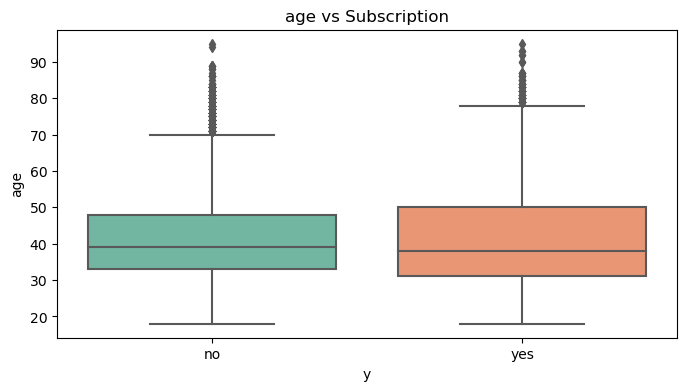

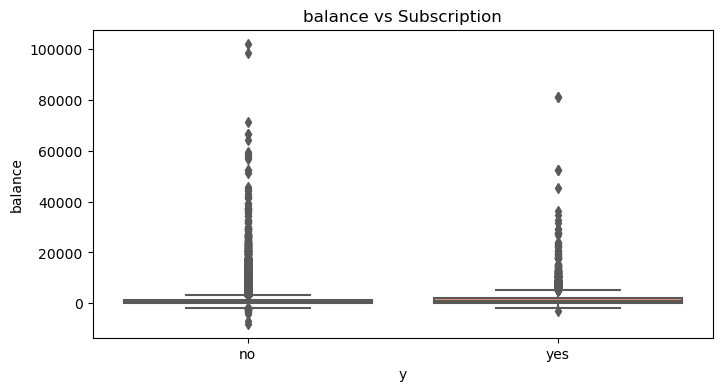

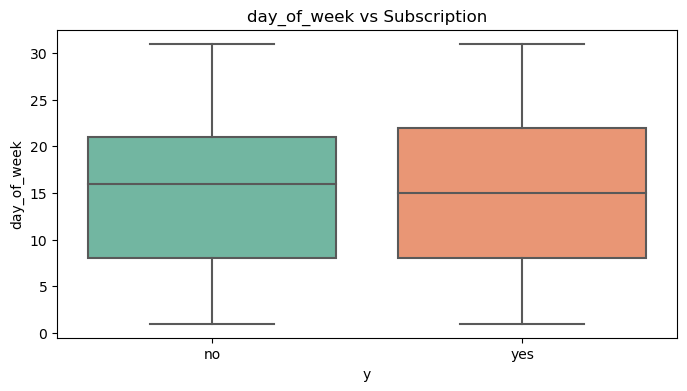

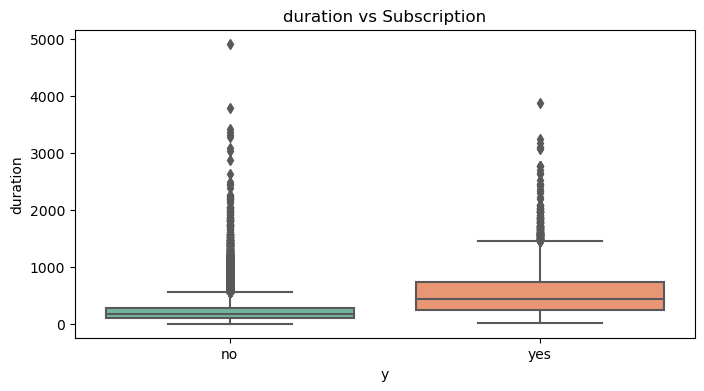

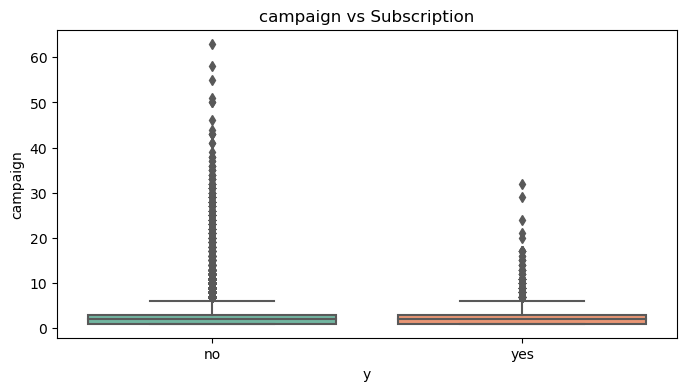

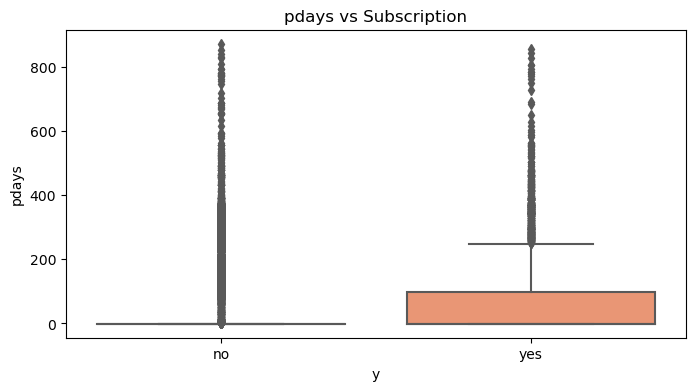

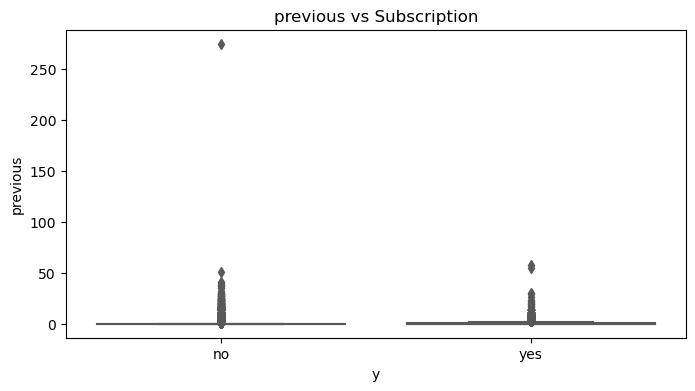

In [ ]:
# For numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Boxplots for numerical features against target
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Subscription')
    plt.show()


### **Conclusion:**
- **Age:** Older clients show a slightly higher subscription rate.
- **Balance:** Higher balances correlate with increased subscriptions, but outliers exist.
- **Duration:** Strongest predictor — longer calls often lead to subscriptions. **⚠️ Exclude during model training** to prevent data leakage.
- **Campaign:** Diminishing returns with frequent contacts — consider capping.
- **Pdays:** 999 indicates never contacted — needs special handling.
- **Previous:** Positive correlation with subscription rates, but highly skewed.

**Action Plan:**
- Apply transformations (e.g., log) for skewed data.
- Cap outliers in **balance** and **campaign**.
- Replace **pdays = 999** with -1 or create a binary feature.
- Exclude **duration** from the model to avoid data leakage.


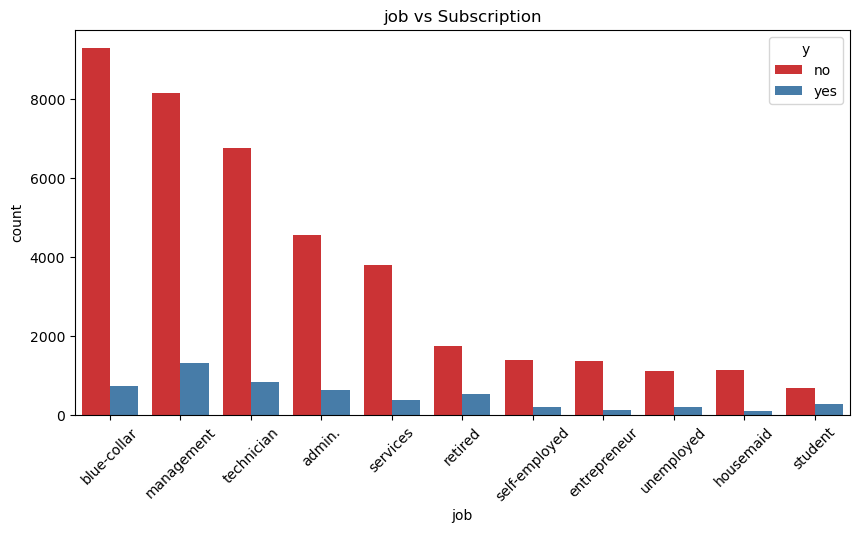

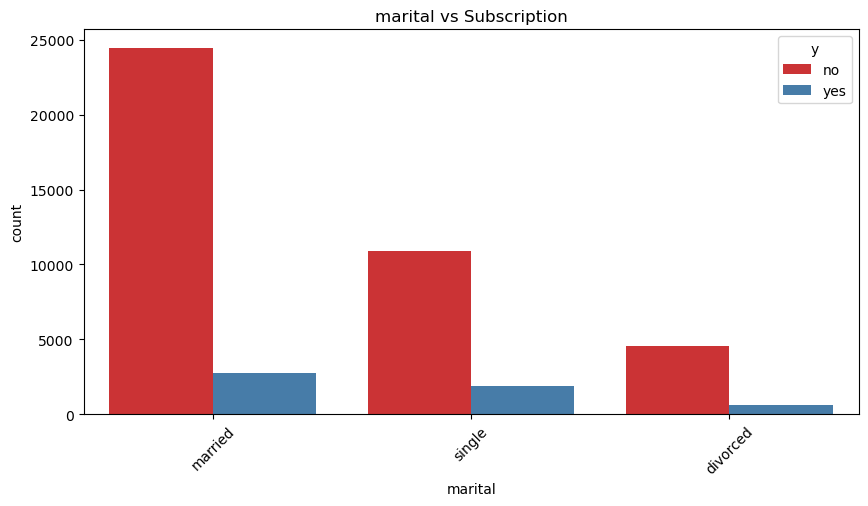

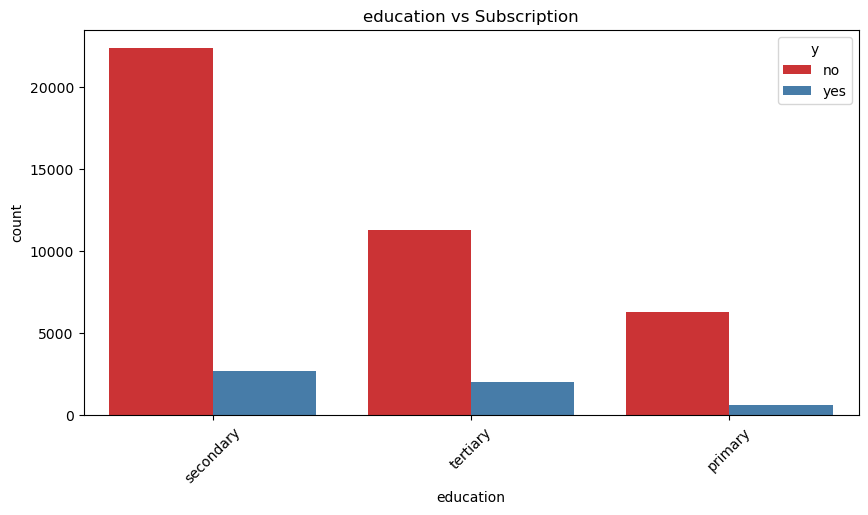

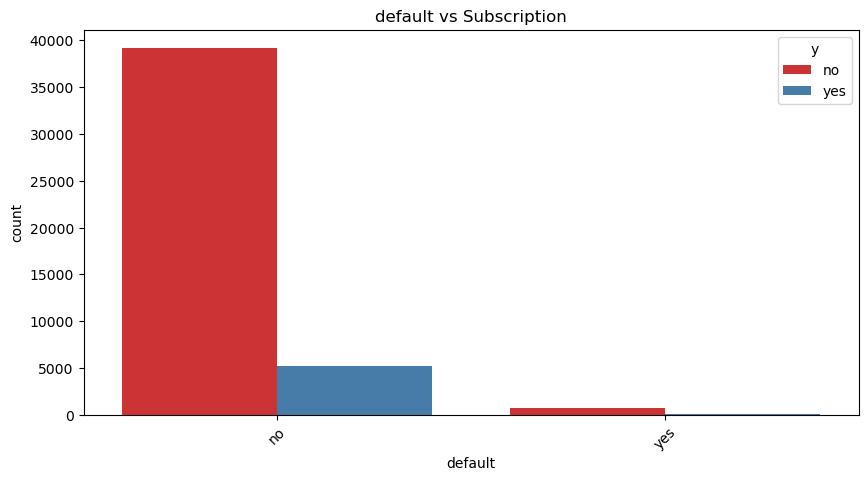

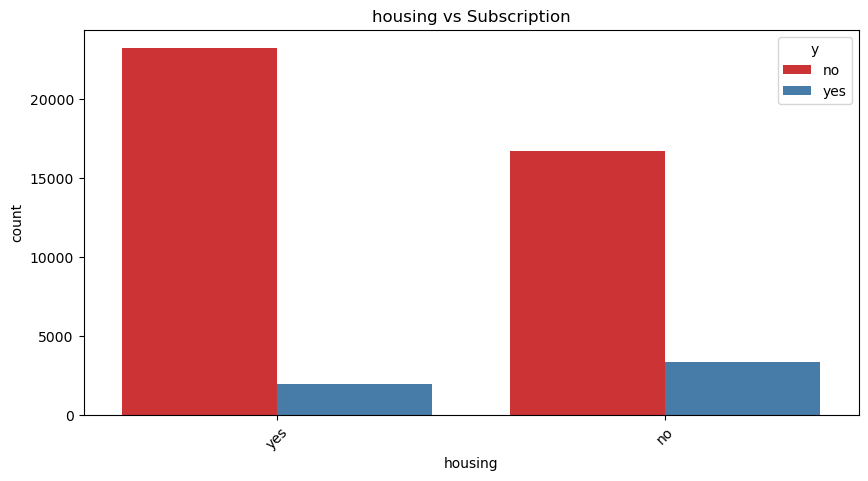

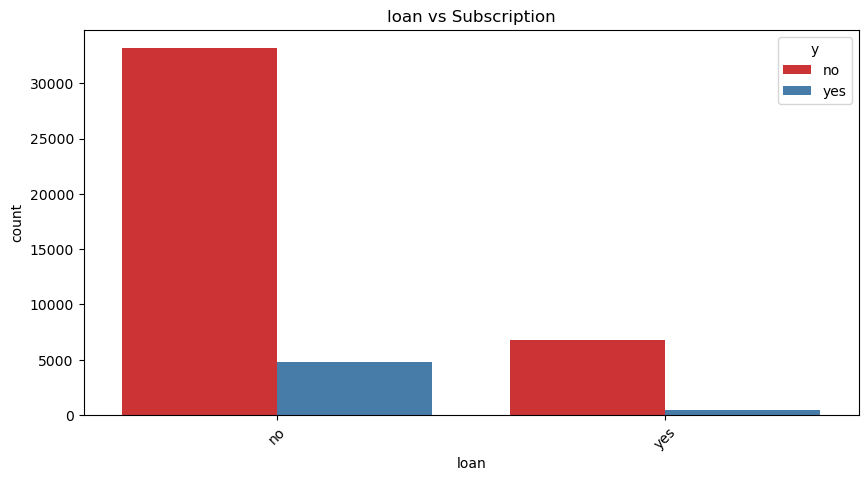

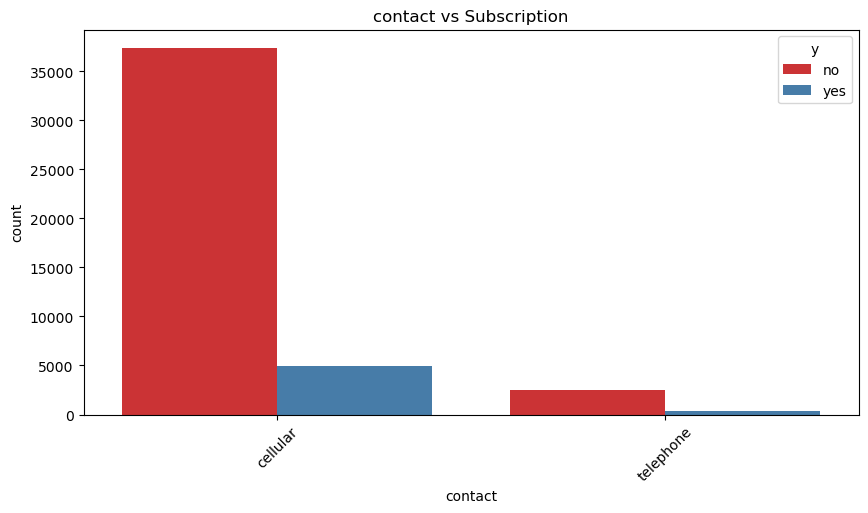

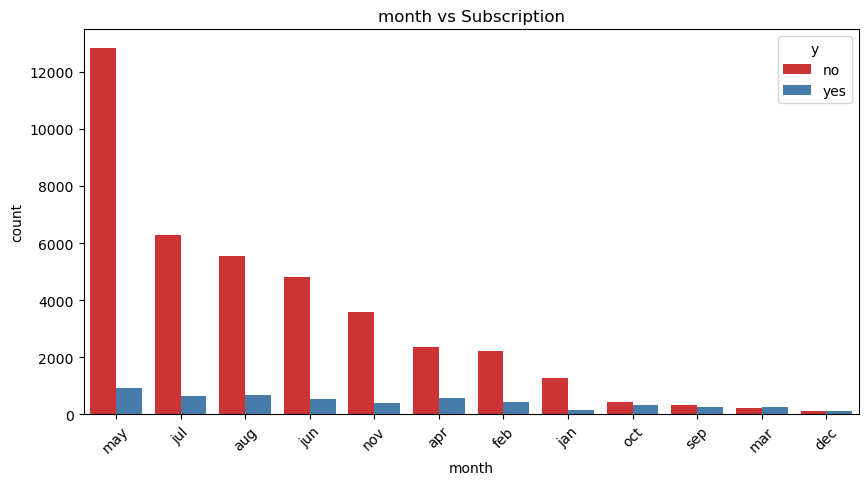

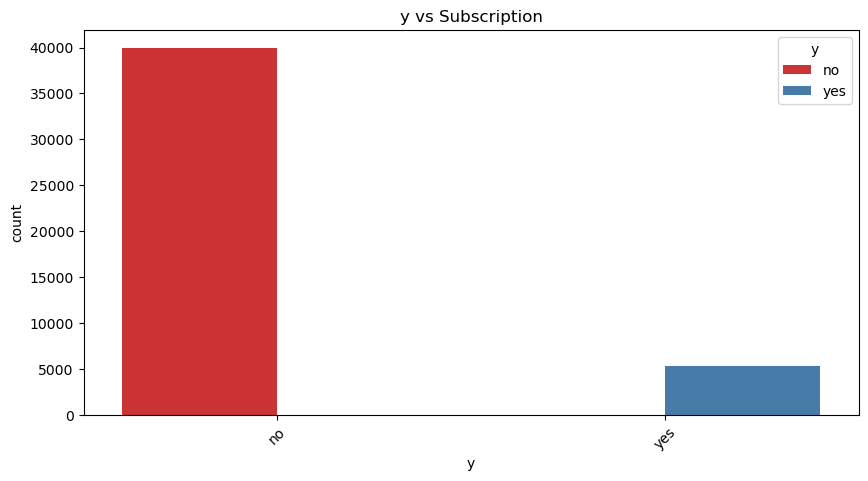

In [40]:
#For categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Countplots for categorical variables against target
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='y', palette='Set1', order=df[col].value_counts().index)
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.show()


### **Conclusion:**
- **Job:** Subscription rates vary across professions. Blue-collar jobs are most common but not the most successful.
- **Marital:** Married clients dominate but don’t necessarily have the highest subscription rates.
- **Education:** Weak correlation with the target — consider merging similar education levels.
- **Default & Housing:** Influence subscription likelihood — class imbalance in **default** needs handling.
- **Month:** Subscription success varies by month — strong seasonal trends identified.

**Action Plan:**
- Consider merging rare job categories.
- Handle class imbalance in **default**.
- Create time-based features (e.g., "high subscription months") from **month**.


Part 4: Co-relational Analysis for Numerical Features

In [44]:
#encoding y

encoder={'yes':1, 'no':0}

df['y_encoded']=df['y'].map(encoder)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  y            45211 non-null  object
 16  y_encoded    45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


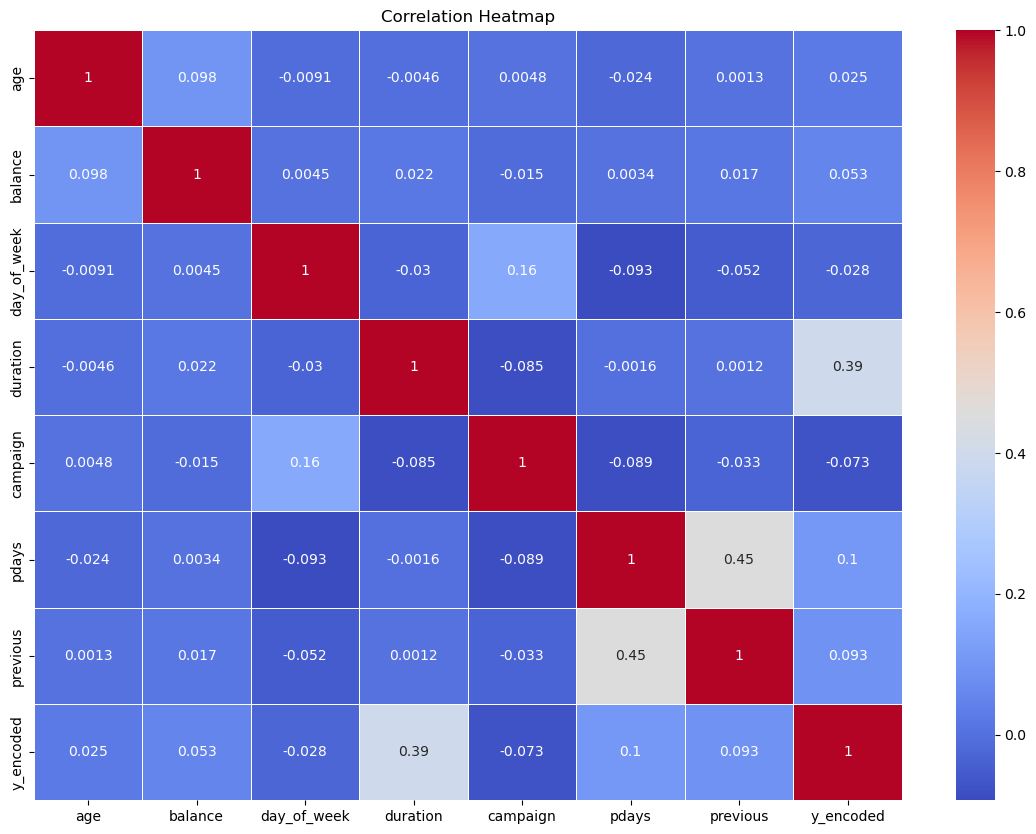

In [46]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Conclusion:**
- **Duration** has the highest correlation with the target but should be excluded from training to prevent data leakage.
- **Balance** and **previous** show mild correlations with the target.
- No severe multicollinearity detected between features.

**Action Plan:**
- Exclude **duration** from model training.
- Retain moderately correlated features for further analysis.


Part 5: Creamver's V categorical variables

In [48]:
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Apply Cramér's V for all categorical columns
cramers_v_scores = {}
for col in cat_cols:
    confusion_matrix = pd.crosstab(df[col], df['y'])
    cramers_v_scores[col] = cramers_v(confusion_matrix)

# Create DataFrame for Cramér's V scores
cramers_v_df = pd.DataFrame(cramers_v_scores.items(), columns=['Feature', 'Cramers_V']).sort_values(by='Cramers_V', ascending=False)
cramers_v_df


,Feature,Cramers_V
8,y,0.999893
7,month,0.259772
4,housing,0.139025
0,job,0.134721
2,education,0.070048
5,loan,0.067929
1,marital,0.065590
3,default,0.021656
6,contact,0.013083


### **Conclusion:**
| **Feature**  | **Cramér's V** | **Association Strength** |
|--------------|----------------|--------------------------|
| **y**        | 0.9999         | Perfect (target variable) |
| **month**    | 0.2598         | Strong                    |
| **housing**  | 0.1390         | Moderate                  |
| **job**      | 0.1347         | Moderate                  |
| **education**| 0.0700         | Weak                      |

**Insights:**
- **Month** has the strongest correlation with the target — seasonal trends matter.
- **Housing** and **Job** show moderate influence.
- **Education** shows a weak association — consider dimensionality reduction or interaction terms.

**Action Plan:**
- Engineer time-based features from **month**.
- Retain **housing** and **job** in modeling.
- Evaluate the importance of **education** during model training.
